# Problem to address
2: Who are the target audience on a video in each category and what should be the ideal upload time for that YouTuber? Create an upload schedule for a YouTuber according to his content category.

Approach:

Map category to upload time and find out the best one.


# Import all the required python libraries  
*View and clean the dataset for intital analysis, remove the unnecesary values and merge the datasets*

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime, time, timedelta

In [4]:
channels_df = pd.read_csv('dataset_datahack_channels.csv')

In [5]:
videos_df = pd.read_csv('dataset_datahack_videos.csv')

In [6]:
channels_df.head()

,Unnamed: 0.1,Unnamed: 0,channel_id,channel_title,description,view_count,subscriber_count,video_count,created_time,uploads,other_links
0,0,0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193,2017-05-18T17:27:05Z,UUn_l37ETRGxVsVqPAZM-y7w,['https://www.youtube.com/redirect?event=chann...
1,1,1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196,2020-09-07T06:42:54.28756Z,UUg3811K2k6ZW0T9wrUyq7UQ,['https://www.youtube.com/redirect?event=chann...
2,2,2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468,2021-05-28T08:27:39.183399Z,UUO1-i4iqe_Kg0B-nwt5W0Gg,['https://www.youtube.com/redirect?event=chann...
3,3,3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339,2021-03-03T00:59:54.797482Z,UU6AhmVhClcDx2RPsFFw_fAA,[]
4,4,4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184,2016-05-16T16:06:36Z,UU5v-gTzCpaY257sxx-8P_-Q,[]


In [7]:
channels_df.shape


(50, 11)

In [8]:
videos_df.head()

,Unnamed: 0.1,Unnamed: 0,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",PT18M59S,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,1,1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",PT3M28S,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,2,2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",PT13M28S,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,3,3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",PT12M50S,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,4,4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",PT16M7S,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...


In [9]:
videos_df.shape


(471, 17)

In [10]:
channels_df.isna().sum()

Unnamed: 0.1        0
Unnamed: 0          0
channel_id          0
channel_title       0
description         1
view_count          0
subscriber_count    0
video_count         0
created_time        0
uploads             0
other_links         0
dtype: int64

In [11]:
videos_df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
index                0
video_id             0
title                0
description         18
category_id          0
tags                 0
duration             0
view_count           0
likes                0
comments             0
upload_time          0
channel_title        0
thumbnail            0
topic_categories     0
Comments             0
dtype: int64

In [12]:
videos_df.dtypes

Unnamed: 0.1         int64
Unnamed: 0           int64
index                int64
video_id            object
title               object
description         object
category_id          int64
tags                object
duration            object
view_count           int64
likes                int64
comments             int64
upload_time         object
channel_title       object
thumbnail           object
topic_categories    object
Comments            object
dtype: object

In [13]:
videos_df.duration.unique()

array(['PT18M59S', 'PT3M28S', 'PT13M28S', 'PT12M50S', 'PT16M7S',
       'PT18M40S', 'PT8M10S', 'PT13M24S', 'PT8M9S', 'PT59S', 'PT1H7M59S',
       'PT48S', 'PT10M10S', 'PT13M21S', 'PT11M27S', 'PT1M38S', 'PT54S',
       'PT24M4S', 'PT16S', 'PT22S', 'PT14M10S', 'PT3M48S', 'PT12M26S',
       'PT42S', 'PT20S', 'PT8M21S', 'PT7M2S', 'PT47S', 'PT58S', 'PT27M7S',
       'PT9M27S', 'PT44S', 'PT5M49S', 'PT19M17S', 'PT1H12M27S',
       'PT13M38S', 'PT14S', 'PT6M23S', 'PT3M1S', 'PT15M39S', 'PT12M11S',
       'PT4M33S', 'PT54M41S', 'PT8M38S', 'PT45S', 'PT9M11S', 'PT8M12S',
       'PT14M59S', 'PT7M19S', 'PT5M32S', 'PT3M4S', 'PT32S', 'PT7M4S',
       'PT12M33S', 'PT1M1S', 'PT9M16S', 'PT18M6S', 'PT18M17S', 'PT8M28S',
       'PT8M25S', 'PT11M16S', 'PT19M38S', 'PT4M29S', 'PT30S', 'PT41S',
       'PT4M6S', 'PT3M49S', 'PT53S', 'PT4M8S', 'PT11M12S', 'PT13M36S',
       'PT1M32S', 'PT18M27S', 'PT1M7S', 'PT7M1S', 'PT57S', 'PT7M37S',
       'PT5M35S', 'PT8M50S', 'PT15M20S', 'PT8M43S', 'PT4M32S', 'PT1M',
       

Convert duration column to timedelta

In [15]:
videos_df['duration'] = videos_df['duration'].apply(lambda x: timedelta(seconds=sum(int(i[:-1]) * {'H': 3600, 'M': 60, 'S': 1}[i[-1]] for i in re.findall(r'\d+[HMS]', x))))

Format the duration as HH:MM:SS

In [16]:
videos_df['duration'] = videos_df['duration'].apply(lambda x: str(datetime.min + x).split(' ')[1])

In [17]:
videos_df

,Unnamed: 0.1,Unnamed: 0,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,thumbnail,topic_categories,Comments
0,0,0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...
1,1,1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,"['https://en.wikipedia.org/wiki/Hobby', 'https...",['Congratulations Aswath Varun.. Way to go bro...
2,2,2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,['https://en.wikipedia.org/wiki/Society'],"[""So nice explaining, can't express in words"",..."
3,3,3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['I recently delivered a baby boy. He is 10 da...
4,4,4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['https://en.wikipedia.org/wiki/Action-adventu...,['Pet btao and Subscribe krke Heart lelo \r IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,466,466,742,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",00:00:59,2351,185,0,2023-02-21T12:57:44Z,Ishaan Arora,{'url': 'https://i.ytimg.com/vi/r6C1nf_iz3o/de...,['https://en.wikipedia.org/wiki/Knowledge'],"[""Hello Everyone, My Name is Ishaan Arora.I'm ..."
467,467,467,743,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",00:32:10,38969,1245,182,2023-03-16T14:30:01Z,warikoo,{'url': 'https://i.ytimg.com/vi/515fPTbB-2o/de...,"['https://en.wikipedia.org/wiki/Business', 'ht...",['Get my new book ‘GET EPIC SHIT DONE’ here: h...
468,468,468,745,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",00:09:00,34971,1451,80,2023-03-05T08:30:18Z,CA Rachana Phadke Ranade,{'url': 'https://i.ytimg.com/vi/rJd57wSoxs8/de...,['https://en.wikipedia.org/wiki/Society'],['I showed this video to my spouse. She is hap...
469,469,469,747,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:13:58,584614,40702,1493,2023-03-27T06:30:41Z,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/sVte67QEAvU/de...,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,['Mother-Daugher love is pure... both of you l...


In [18]:
videos_df.channel_title.value_counts()

Ishaan Arora                    15
Sambhavna Seth Entertainment    15
SELEM YT                        15
Amusing Rii                     15
Prabhat Gamer                   15
ChessBase India                 15
ANS Entertainment               15
Comedy Box R k Gautam           15
MOinsideHIT                     15
Nazar Battu                     15
Comedian Vikas Thakur           15
Paglaa Tech                     14
NeuzBoy                         14
Neon Man                        14
Gate Smashers                   14
SAURABH DAHIVADKAR              14
AG !                            14
Finance With Sharan             14
Onkiify                         14
Jenny's Lectures CS IT          14
R.G Bucket List                 13
Anime Spirit                    13
Mumbiker Nikhil                 13
CA Rachana Phadke Ranade        13
Rohan Joshi                     13
Majnu Gaming                    12
Prafull MBA CHAI WALA           11
SeeKen                          11
warikoo             

In [19]:
channels_df = channels_df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0','created_time','uploads','other_links'], axis = 1)

In [20]:
channels_df.head()

,channel_id,channel_title,description,view_count,subscriber_count,video_count
0,UCn_l37ETRGxVsVqPAZM-y7w,Onkiify,Ahoy! Gamers What is Up it's your Boi Onkiify....,1443714,4820,193
1,UCg3811K2k6ZW0T9wrUyq7UQ,Boyzz World Gaming,Sup Guys\n I'm just a Weirdo W...,761326,1690,196
2,UCO1-i4iqe_Kg0B-nwt5W0Gg,Majnu Gaming,"Hello Gamer's 😍\n\nHello Family, \nMera Name H...",290799,4690,468
3,UC6AhmVhClcDx2RPsFFw_fAA,SELEM YT,\nAGAR AAP LOG FREE FIRE LOVER❤️ HO TO MERA CH...,6427859,133000,339
4,UC5v-gTzCpaY257sxx-8P_-Q,Paglaa Tech,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184


In [21]:
channels_df.shape

(50, 6)

In [22]:
videos_df.topic_categories.unique()

array(["['https://en.wikipedia.org/wiki/Action-adventure_game', 'https://en.wikipedia.org/wiki/Action_game', 'https://en.wikipedia.org/wiki/Role-playing_video_game', 'https://en.wikipedia.org/wiki/Video_game_culture']",
       "['https://en.wikipedia.org/wiki/Hobby', 'https://en.wikipedia.org/wiki/Lifestyle_(sociology)']",
       "['https://en.wikipedia.org/wiki/Society']",
       "['https://en.wikipedia.org/wiki/Lifestyle_(sociology)']",
       "['https://en.wikipedia.org/wiki/Entertainment', 'https://en.wikipedia.org/wiki/Film']",
       "['https://en.wikipedia.org/wiki/Entertainment', 'https://en.wikipedia.org/wiki/Film', 'https://en.wikipedia.org/wiki/Television_program']",
       "['https://en.wikipedia.org/wiki/Knowledge']",
       "['https://en.wikipedia.org/wiki/Action_game', 'https://en.wikipedia.org/wiki/Video_game_culture']",
       "['https://en.wikipedia.org/wiki/Motorsport', 'https://en.wikipedia.org/wiki/Sport']",
       "['https://en.wikipedia.org/wiki/Lifestyle_(sociol

In [23]:
videos_df = videos_df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'index', 'thumbnail', 'Comments'], axis = 1)

In [24]:
videos_df.head()

,video_id,title,description,category_id,tags,duration,view_count,likes,comments,upload_time,channel_title,topic_categories
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10T09:32:59Z,Paglaa Tech,['https://en.wikipedia.org/wiki/Action-adventu...
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29T06:30:09Z,ChessBase India,"['https://en.wikipedia.org/wiki/Hobby', 'https..."
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26T05:16:10Z,SeeKen,['https://en.wikipedia.org/wiki/Society']
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04T07:45:08Z,Sambhavna Seth Entertainment,['https://en.wikipedia.org/wiki/Lifestyle_(soc...
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12T07:50:52Z,Paglaa Tech,['https://en.wikipedia.org/wiki/Action-adventu...


In [25]:
videos_df.shape

(471, 12)

In [26]:
channels_df['channel_title'] = channels_df['channel_title'].astype('str')

In [27]:
videos_df['channel_title'] = videos_df['channel_title'].astype('str')

In [28]:
channels_df.dtypes

channel_id          object
channel_title       object
description         object
view_count           int64
subscriber_count     int64
video_count          int64
dtype: object

In [29]:
videos_df.dtypes

video_id            object
title               object
description         object
category_id          int64
tags                object
duration            object
view_count           int64
likes                int64
comments             int64
upload_time         object
channel_title       object
topic_categories    object
dtype: object

In [30]:
merge_df = videos_df.merge(channels_df, on = "channel_title", how = "left")

In [77]:
merge_df.head()

,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,comments,upload_time,channel_title,topic_categories,channel_id,description_y,view_count_y,subscriber_count,video_count
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10 09:32:59+00:00,Paglaa Tech,[ A c t i o n - a d v e n t u r e _ g a m e ' ...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29 06:30:09+00:00,ChessBase India,"[ H o b b y ' , L i f e s t y l e _ ( s o c i...",UCIsEhwBMPkRHsEgqYAPQHsA,"ChessBase India is the ""Most Popular"" chess pl...",909271596,1170000,8777
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26 05:16:10+00:00,SeeKen,[ S o c i e t y ' ] ],UCfhbydY40P2Lli9HuBz8cdA,IMPROVING THE QUALITY OF OUR LIFE BY GAINING K...,295923498,3920000,444
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04 07:45:08+00:00,Sambhavna Seth Entertainment,[ L i f e s t y l e _ ( s o c i o l o g y ) ' ] ],UChZ0JmGgyOWSU-1iXxPhsVA,This is the official channel of Sambhavna Seth...,1975052135,3460000,1568
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12 07:50:52+00:00,Paglaa Tech,[ A c t i o n - a d v e n t u r e _ g a m e ' ...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184


In [78]:
merge_df.dtypes

video_id                         object
title                            object
description_x                    object
category_id                       int64
tags                             object
duration                         object
view_count_x                      int64
likes                             int64
comments                          int64
upload_time         datetime64[ns, UTC]
channel_title                    object
topic_categories                 object
channel_id                       object
description_y                    object
view_count_y                      int64
subscriber_count                  int64
video_count                       int64
dtype: object

In [79]:
merge_df['upload_time'] = pd.to_datetime(merge_df['upload_time'], format='%Y-%m-%dT%H:%M:%SZ', utc=True)

In [80]:
merge_df

,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,comments,upload_time,channel_title,topic_categories,channel_id,description_y,view_count_y,subscriber_count,video_count
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10 09:32:59+00:00,Paglaa Tech,[ A c t i o n - a d v e n t u r e _ g a m e ' ...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29 06:30:09+00:00,ChessBase India,"[ H o b b y ' , L i f e s t y l e _ ( s o c i...",UCIsEhwBMPkRHsEgqYAPQHsA,"ChessBase India is the ""Most Popular"" chess pl...",909271596,1170000,8777
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26 05:16:10+00:00,SeeKen,[ S o c i e t y ' ] ],UCfhbydY40P2Lli9HuBz8cdA,IMPROVING THE QUALITY OF OUR LIFE BY GAINING K...,295923498,3920000,444
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04 07:45:08+00:00,Sambhavna Seth Entertainment,[ L i f e s t y l e _ ( s o c i o l o g y ) ' ] ],UChZ0JmGgyOWSU-1iXxPhsVA,This is the official channel of Sambhavna Seth...,1975052135,3460000,1568
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12 07:50:52+00:00,Paglaa Tech,[ A c t i o n - a d v e n t u r e _ g a m e ' ...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,r6C1nf_iz3o,"""Tell me about Yourself"" ka SABSE SAHI Answer","Hello Everyone, My Name is Ishaan Arora.\nI'm ...",27,"['finladder ishaan arora', 'tedx ishaan arora'...",00:00:59,2351,185,0,2023-02-21 12:57:44+00:00,Ishaan Arora,[ K n o w l e d g e ' ] ],UCkOtNAT3-B2rAPEleWaytrA,College mein ho? To sahi jagah aaye ho! :)\n\n...,917729,19800,100
467,515fPTbB-2o,Is 2023 the BEST YEAR to START UP? | Antler In...,Get my new book ‘GET EPIC SHIT DONE’ here: htt...,27,"['warikoo', 'ankur warikoo', 'Ankur Warikoo mo...",00:32:10,38969,1245,182,2023-03-16 14:30:01+00:00,warikoo,"[ B u s i n e s s ' , S o c i e t y ' ] ]",UCRzYN32xtBf3Yxsx5BvJWJw,"warikoo is a serial entrepreneur, a bestsellin...",214606523,2800000,861
468,rJd57wSoxs8,Top 4 Reasons To Learn Personal Finance | Wome...,✔️ Invest in Knowledge: https://social.rachana...,27,"['CA Rachana Ranade', 'stock market basics', '...",00:09:00,34971,1451,80,2023-03-05 08:30:18+00:00,CA Rachana Phadke Ranade,[ S o c i e t y ' ] ],UCe3qdG0A_gr-sEdat5y2twQ,To Learn Stock Market in simplified language c...,231870766,4360000,1013
469,sVte67QEAvU,Mummy ka Vlog TRENDING pe le aao!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:13:58,584614,40702,1493,2023-03-27 06:30:41+00:00,Sambhavna Seth Entertainment,[ L i f e s t y l e _ ( s o c i o l o g y ) ' ] ],UChZ0JmGgyOWSU-1iXxPhsVA,This is the official channel of Sambhavna Seth...,1975052135,3460000,1568


In [81]:
merge_df.to_csv("sample1.csv")

# Finding the categories of the videos 
Plotting the categories according to the number of videos in each categories 

In [ ]:
def url_tocategory(url):
    category = url.split(',')[-1].replace('', ' ')
    return category
# apply the function to the topic_categories column
merge_df['topic_categories'] = merge_df['topic_categories'].apply(lambda x: [url_tocategory(url) for url in x.split(',')])

In [84]:
merge_df.head()

,video_id,title,description_x,category_id,tags,duration,view_count_x,likes,comments,upload_time,channel_title,topic_categories,channel_id,description_y,view_count_y,subscriber_count,video_count
0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",00:18:59,108078,3539,840,2023-03-10 09:32:59+00:00,Paglaa Tech,[ A c t i o n - a d v e n t u r e _ g a m e ' ...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184
1,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",00:03:28,2082,74,5,2023-03-29 06:30:09+00:00,ChessBase India,"[ H o b b y ' , L i f e s t y l e _ ( s o c i...",UCIsEhwBMPkRHsEgqYAPQHsA,"ChessBase India is the ""Most Popular"" chess pl...",909271596,1170000,8777
2,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",00:13:28,91801,5100,220,2023-03-26 05:16:10+00:00,SeeKen,[ S o c i e t y ' ] ],UCfhbydY40P2Lli9HuBz8cdA,IMPROVING THE QUALITY OF OUR LIFE BY GAINING K...,295923498,3920000,444
3,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",00:12:50,1059186,46367,1846,2023-03-04 07:45:08+00:00,Sambhavna Seth Entertainment,[ L i f e s t y l e _ ( s o c i o l o g y ) ' ] ],UChZ0JmGgyOWSU-1iXxPhsVA,This is the official channel of Sambhavna Seth...,1975052135,3460000,1568
4,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",00:16:07,155964,6147,1163,2023-03-12 07:50:52+00:00,Paglaa Tech,[ A c t i o n - a d v e n t u r e _ g a m e ' ...,UC5v-gTzCpaY257sxx-8P_-Q,1000 subscribers - 31/12/2021\n10000 subscribe...,17097445,147000,184


In [85]:
merge_df.topic_categories.value_counts()

[ E n t e r t a i n m e n t ' ,  F i l m ' ] ]                                                                                                                              86
[ K n o w l e d g e ' ] ]                                                                                                                                                   79
[ L i f e s t y l e _ ( s o c i o l o g y ) ' ] ]                                                                                                                           52
[ S o c i e t y ' ] ]                                                                                                                                                       51
[ E n t e r t a i n m e n t ' ,  F i l m ' ,  H u m o u r ' ] ]                                                                                                             27
[ A c t i o n - a d v e n t u r e _ g a m e ' ,  A c t i o n _ g a m e ' ,  R o l e - p l a y i n g _ v i d e o _ g a m e ' ,

<Axes: >

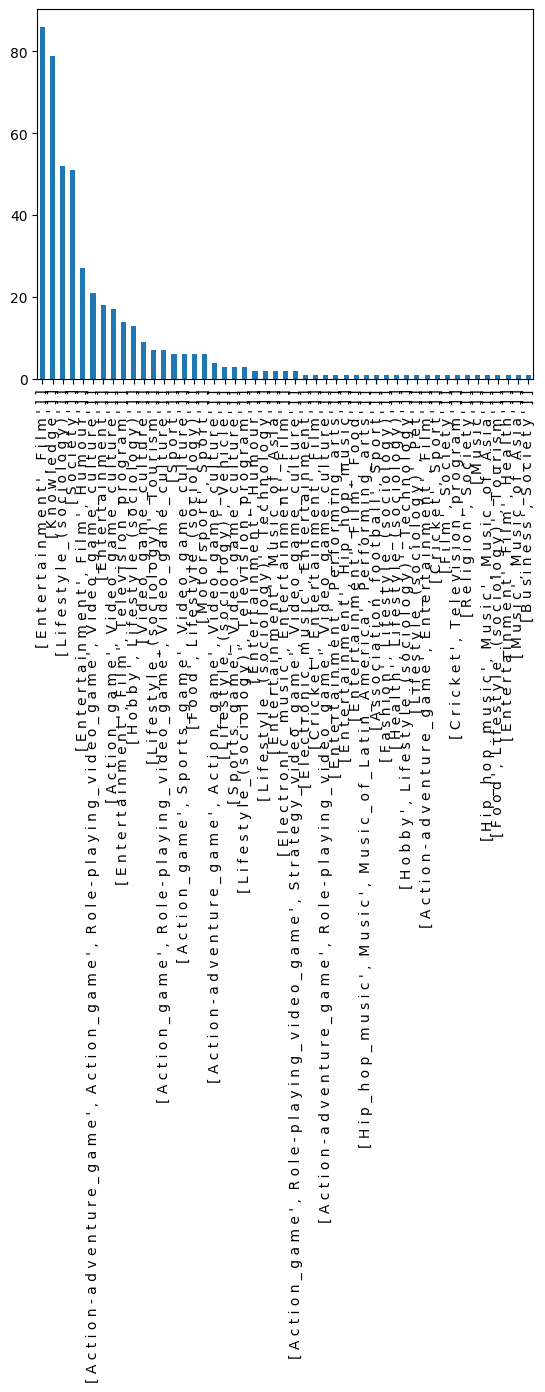

In [89]:
merge_df['topic_categories'].value_counts().plot.bar()

# Most suitable time
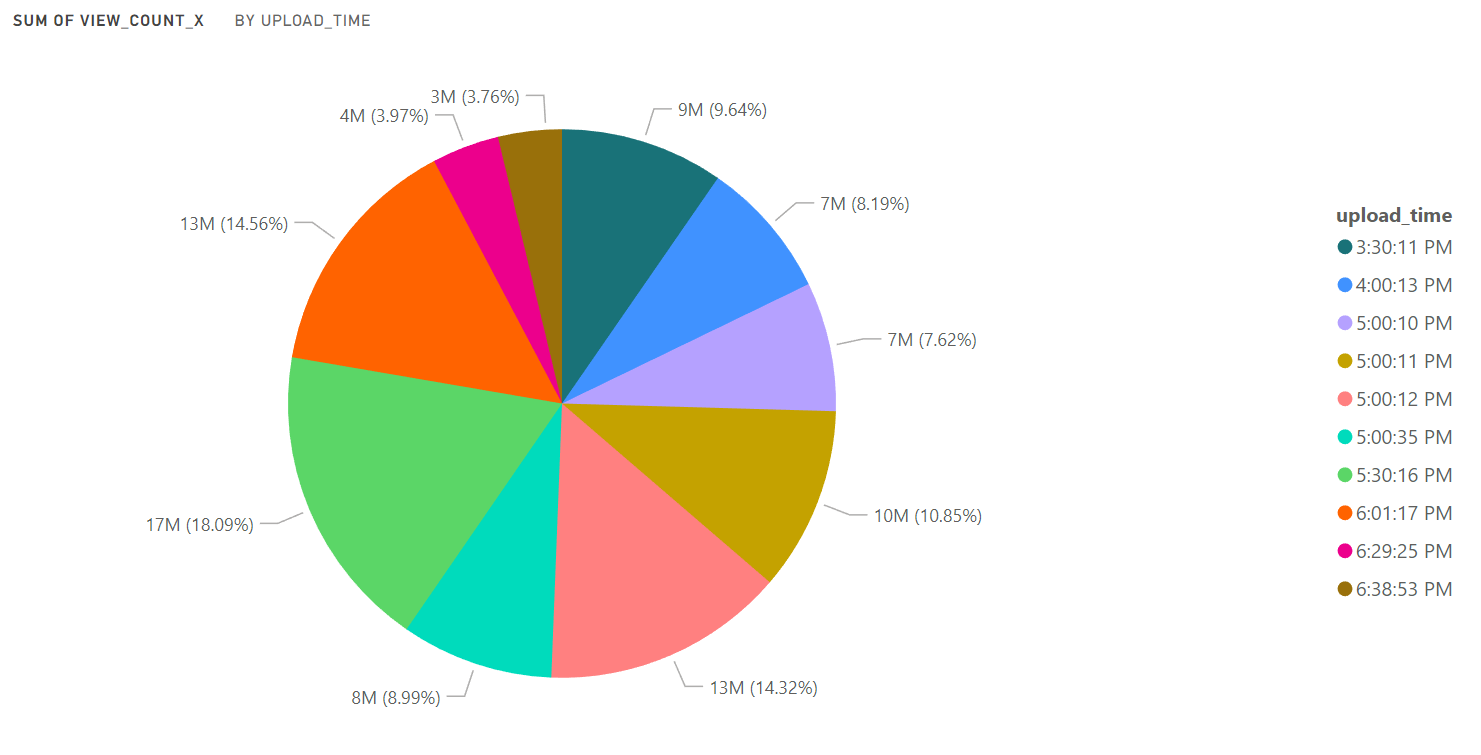
Category: Entertainment, Film 

- **Most optimum upload time:**
-  Around 5:30 PM
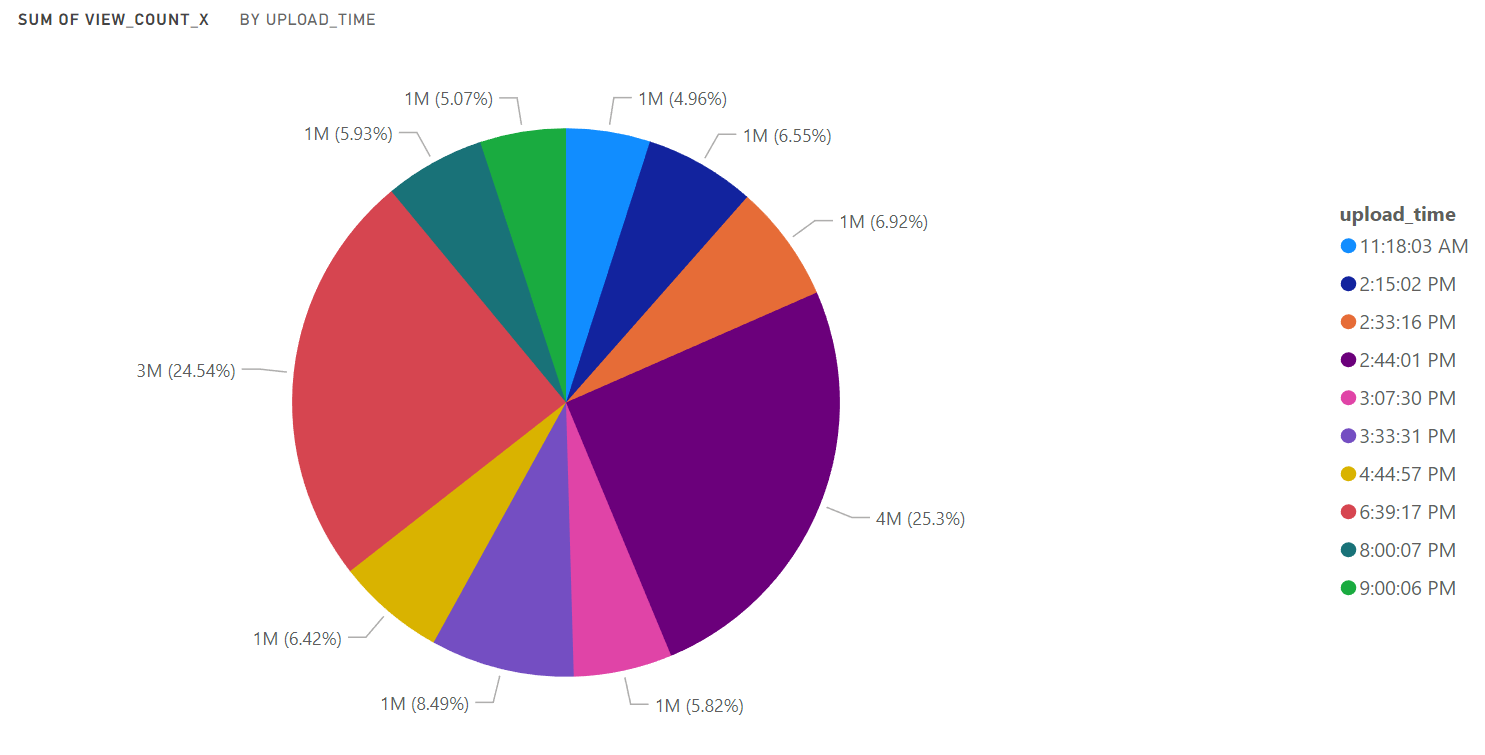
Category: Knowledge 
- **Most optimum upload time:**
-  Around 2:45 PM
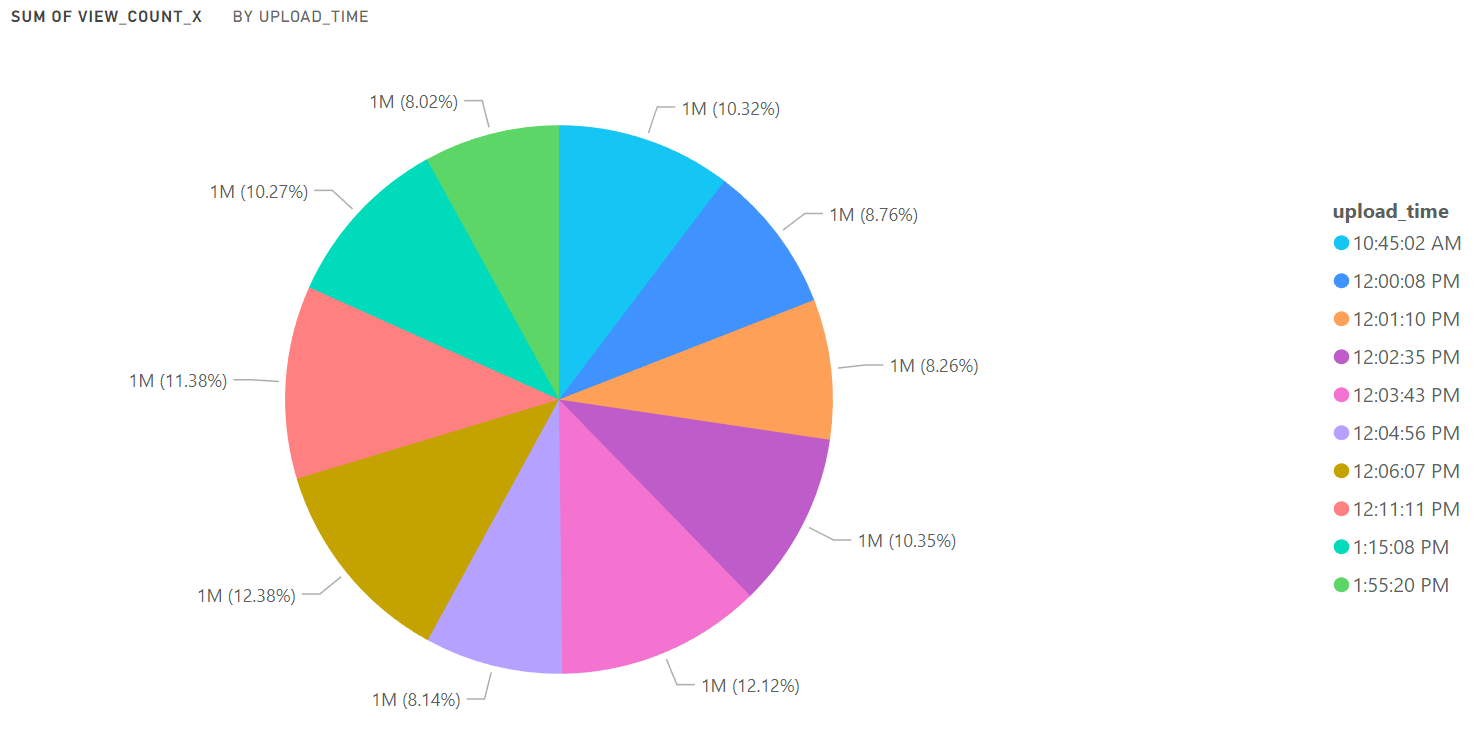
Category: Lifestyle and Sociology 
- **Most optimum upload time:**
-  Around 12 PM  
The above graphs show us the most suitable upload time for the top 3 categories. 

## As we can clearly see in the above visualisations, most optimum upload time and views changes according to the category of the videos. 

**In order to get maximum views, the youtuber should be mindful of which category their video exactly falls into and upload videos according to the most optimum time for that category.** 

